In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, convolve

In [17]:
df = pd.read_csv('Logs/scans_angle_11_25_pos_8_rot_1.csv')

In [18]:
df

,0.0,11.25,22.5,33.75,45.0,56.25,67.5,78.75,90.0,101.25,...,292.5,303.75,315.0,326.25,337.5,348.75,shape,position,sensor_rotation,angle
0,145,145,145,145,145,145,145,145,145,149,...,145,145,145,145,145,145,cylinder,8,1,11.25
1,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,141,145,cylinder,8,1,11.25
2,145,145,145,145,145,145,145,145,145,148,...,145,145,145,145,145,145,cylinder,8,1,11.25
3,145,145,145,145,145,145,145,145,145,148,...,145,145,145,145,145,141,cylinder,8,1,11.25
4,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,cylinder,8,1,11.25
5,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,cylinder,8,1,11.25
6,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,cylinder,8,1,11.25
7,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,cylinder,8,1,11.25
8,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,cylinder,8,1,11.25
9,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,141,cylinder,8,1,11.25


In [19]:
df_data = df.iloc[:, :-4]

In [20]:
def header_to_int(df: pd.DataFrame):
    columns = df.columns.values
    columns_int = [float(column) for column in columns]
    return columns_int
    

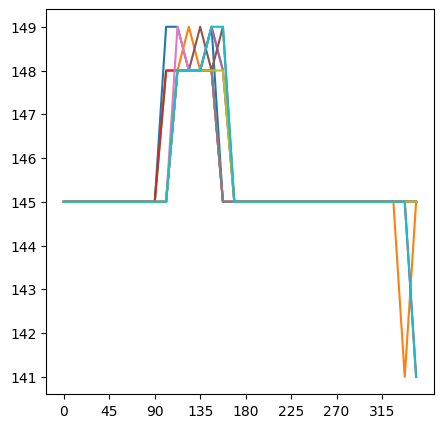

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
for i in range(10):
    ax.plot(header_to_int(df_data), df_data.iloc[i, :])
    ax.set_xticks(np.arange(0,360,45))


In [115]:
def calculate_shift_correlation(series1: pd.Series, series2: pd.Series, max_shift: int = 10):
    correlations = []
    shifts = range(-max_shift, max_shift + 1)
    for shift in shifts:
        if shift > 0:
            corr = np.corrcoef(series1[shift:], series2[:-shift])[0, 1]
        elif shift < 0:
            corr = np.corrcoef(series1[:shift], series2[-shift:])[0, 1]
        else:
            corr = np.corrcoef(series1, series2)[0, 1]
        correlations.append(corr)
        
    max_corr_shift = shifts[np.argmax(correlations)]
    return max_corr_shift

shift = calculate_shift_correlation(df_data.iloc[0], df_data.iloc[1])


In [125]:
shift

4

In [122]:
synchronized_data = np.concatenate((df_data.iloc[1,-shift:],df_data.iloc[1].shift(shift).iloc[shift:]))

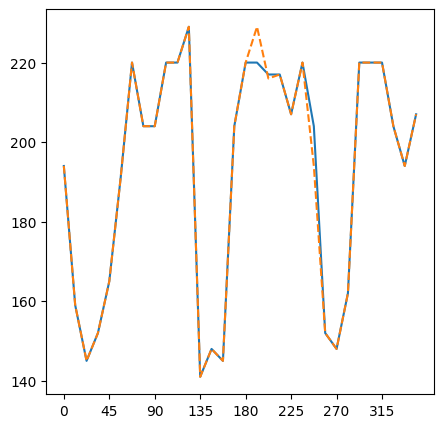

In [129]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(header_to_int(df_data), df_data.iloc[0, :])
ax.set_xticks(np.arange(0,360,45))
ax.plot(header_to_int(df_data), synchronized_data, '--')
plt.show()